In [3]:
# pip install spacy

In [4]:
import nltk
nltk.download('maxent_ne_chunker') # download the maxent chunker for name entiry recognition
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\dai\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\dai\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dai\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

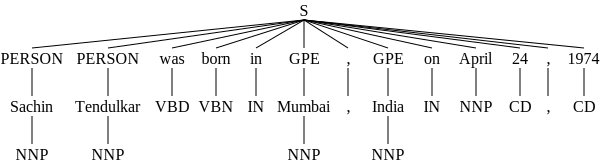

In [5]:
from nltk import word_tokenize, pos_tag, ne_chunk

# sample text
text = "Sachin Tendulkar was born in Mumbai, India on April 24, 1974"

# tokenize the text into words
tokens = word_tokenize(text)

# POS tagging
tags = pos_tag(tokens)

# performing Named Entiry Recognition(NER)

ner_tree = ne_chunk(tags)

# display the NER tree
ner_tree

In [6]:
ner_tree.draw()

In [7]:
pos_tuple=ner_tree.pos()
pos_tuple

[(('Sachin', 'NNP'), 'PERSON'),
 (('Tendulkar', 'NNP'), 'PERSON'),
 (('was', 'VBD'), 'S'),
 (('born', 'VBN'), 'S'),
 (('in', 'IN'), 'S'),
 (('Mumbai', 'NNP'), 'GPE'),
 ((',', ','), 'S'),
 (('India', 'NNP'), 'GPE'),
 (('on', 'IN'), 'S'),
 (('April', 'NNP'), 'S'),
 (('24', 'CD'), 'S'),
 ((',', ','), 'S'),
 (('1974', 'CD'), 'S')]

In [8]:
# printing the named entities only
named_ent = [(ent[0], ent_tag) for ent, ent_tag in pos_tuple if ent_tag not in ['S']]
named_ent

[('Sachin', 'PERSON'),
 ('Tendulkar', 'PERSON'),
 ('Mumbai', 'GPE'),
 ('India', 'GPE')]

#### NER using spacy

In [9]:
import spacy


In [10]:
# !python -m spacy download en_core_web_sm

In [11]:
nlp = spacy.load('en_core_web_sm')

In [12]:
sent = nlp('Mark Zuckerberg will meet Aditya Joshi in New York, USA on Monday 21, 2024 around 4pm to seal a $3 trillion deal.')
sent

Mark Zuckerberg will meet Aditya Joshi in New York, USA on Monday 21, 2024 around 4pm to seal a $3 trillion deal.

In [13]:
sent.ents

(Mark Zuckerberg,
 Aditya Joshi,
 New York,
 USA,
 Monday 21, 2024 around 4pm,
 $3 trillion)

In [14]:
# simple checking for entity of each name
for word in sent.ents:
    print(word.ents[0],'-->', word.label_ )


Mark Zuckerberg --> PERSON
Aditya Joshi --> PERSON
New York --> GPE
USA --> GPE
Monday 21, 2024 around 4pm --> DATE
$3 trillion --> MONEY


In [15]:
# to look at the explanation for an entity type
spacy.explain('PERSON')

'People, including fictional'

In [16]:
sent1 = nlp("On December 7, 2024, at 3:45 PM, a brilliant idea sparked in the bustling city of Tokyo, inspiring 3 million creators worldwide.")
sent1

On December 7, 2024, at 3:45 PM, a brilliant idea sparked in the bustling city of Tokyo, inspiring 3 million creators worldwide.

In [17]:
sent1.ents

(December 7, 2024, 3:45 PM, Tokyo, 3 million)

In [18]:
for word in sent1.ents:
    print(word.ents[0],'-->', word.label_ )

December 7, 2024 --> DATE
3:45 PM --> TIME
Tokyo --> GPE
3 million --> CARDINAL


In [19]:
alaska_data = "Indigenous people have lived in Alaska for thousands of years, and it is widely believed that the region served as the entry point for the initial settlement of North America by way of the Bering land bridge, which acts as a border between the Pacific Ocean and the Arctic Ocean. The Russian Empire was the first to actively colonize the area beginning in the 18th century, eventually establishing Russian America, which spanned most of the current state and promoted and maintained a native Alaskan Creole population.[7] The expense and logistical difficulty of maintaining this distant possession prompted its sale to the U.S. in 1867 for US$7.2 million (equivalent to $157 million in 2023). The area went through several administrative changes before becoming organized as a territory on May 11, 1912. It was admitted as the 49th state of the U.S. on January 3, 1959.[8]"
alaska_data

'Indigenous people have lived in Alaska for thousands of years, and it is widely believed that the region served as the entry point for the initial settlement of North America by way of the Bering land bridge, which acts as a border between the Pacific Ocean and the Arctic Ocean. The Russian Empire was the first to actively colonize the area beginning in the 18th century, eventually establishing Russian America, which spanned most of the current state and promoted and maintained a native Alaskan Creole population.[7] The expense and logistical difficulty of maintaining this distant possession prompted its sale to the U.S. in 1867 for US$7.2 million (equivalent to $157 million in 2023). The area went through several administrative changes before becoming organized as a territory on May 11, 1912. It was admitted as the 49th state of the U.S. on January 3, 1959.[8]'

In [20]:
# removing the [a-z][0-9] citation references
import re
regex = r'\[[a-z0-9]+\]'
cleaned_data = re.sub(regex, '', alaska_data)
cleaned_data

'Indigenous people have lived in Alaska for thousands of years, and it is widely believed that the region served as the entry point for the initial settlement of North America by way of the Bering land bridge, which acts as a border between the Pacific Ocean and the Arctic Ocean. The Russian Empire was the first to actively colonize the area beginning in the 18th century, eventually establishing Russian America, which spanned most of the current state and promoted and maintained a native Alaskan Creole population. The expense and logistical difficulty of maintaining this distant possession prompted its sale to the U.S. in 1867 for US$7.2 million (equivalent to $157 million in 2023). The area went through several administrative changes before becoming organized as a territory on May 11, 1912. It was admitted as the 49th state of the U.S. on January 3, 1959.'

In [21]:
alaska_sent = nlp(cleaned_data)
alaska_sent

Indigenous people have lived in Alaska for thousands of years, and it is widely believed that the region served as the entry point for the initial settlement of North America by way of the Bering land bridge, which acts as a border between the Pacific Ocean and the Arctic Ocean. The Russian Empire was the first to actively colonize the area beginning in the 18th century, eventually establishing Russian America, which spanned most of the current state and promoted and maintained a native Alaskan Creole population. The expense and logistical difficulty of maintaining this distant possession prompted its sale to the U.S. in 1867 for US$7.2 million (equivalent to $157 million in 2023). The area went through several administrative changes before becoming organized as a territory on May 11, 1912. It was admitted as the 49th state of the U.S. on January 3, 1959.

In [22]:
alaska_sent.ents

(Alaska,
 thousands of years,
 North America,
 the Pacific Ocean,
 the Arctic Ocean,
 The Russian Empire,
 first,
 the 18th century,
 Russian America,
 Alaskan,
 U.S.,
 1867,
 US$7.2 million,
 $157 million,
 2023,
 May 11, 1912,
 49th,
 U.S.,
 January 3, 1959)

In [23]:
for word in alaska_sent.ents:
    print(word.ents[0],'-->', word.label_ )

Alaska --> GPE
thousands of years --> DATE
North America --> LOC
the Pacific Ocean --> LOC
the Arctic Ocean --> LOC
The Russian Empire --> GPE
first --> ORDINAL
the 18th century --> DATE
Russian America --> LOC
Alaskan --> NORP
U.S. --> GPE
1867 --> DATE
US$7.2 million --> MONEY
$157 million --> MONEY
2023 --> DATE
May 11, 1912 --> DATE
49th --> ORDINAL
U.S. --> GPE
January 3, 1959 --> DATE


In [24]:
spacy.explain('LOC')

'Non-GPE locations, mountain ranges, bodies of water'

In [25]:
from spacy import displacy

In [26]:
displacy.render(alaska_sent, style='ent', jupyter=True) # renders the text with the specific words and their entity

### Using synsets

In [27]:
from nltk.corpus import wordnet


In [28]:
x = wordnet.synsets('plant')
x

[Synset('plant.n.01'),
 Synset('plant.n.02'),
 Synset('plant.n.03'),
 Synset('plant.n.04'),
 Synset('plant.v.01'),
 Synset('implant.v.01'),
 Synset('establish.v.02'),
 Synset('plant.v.04'),
 Synset('plant.v.05'),
 Synset('plant.v.06')]

In [29]:
# meanings of each word in the synset
for i,word in enumerate(x):
    print(i)
    print(word.definition())

0
buildings for carrying on industrial labor
1
(botany) a living organism lacking the power of locomotion
2
an actor situated in the audience whose acting is rehearsed but seems spontaneous to the audience
3
something planted secretly for discovery by another
4
put or set (seeds, seedlings, or plants) into the ground
5
fix or set securely or deeply
6
set up or lay the groundwork for
7
place into a river
8
place something or someone in a certain position in order to secretly observe or deceive
9
put firmly in the mind


In [30]:
synonyms = set()
for word in wordnet.synsets('plant'):
    synonyms.add(word.lemmas()[0].name())

In [31]:
synonyms

{'establish', 'implant', 'plant'}

In [32]:
# shows the most matching words for the given word(here its plant)
# we are taking index as 0 since only one item is present in the list
x[0].lemmas()

[Lemma('plant.n.01.plant'),
 Lemma('plant.n.01.works'),
 Lemma('plant.n.01.industrial_plant')]

In [33]:
# checking with post
wordnet.synsets('post')[0].lemmas()

[Lemma('post.n.01.post'), Lemma('post.n.01.station')]

### Extract definition and meaning from wordnet

In [34]:
synset = wordnet.synsets('post')
print('Word and Type: ', synset[0].name())
print('Synonym: ', synset[0].lemmas()[0].name())
print('The meaning of the word: ', synset[0].definition())
print('Example: ', str(synset[0].examples()))

Word and Type:  post.n.01
Synonym:  post
The meaning of the word:  the position where someone (as a guard or sentry) stands or is assigned to stand
Example:  ['a soldier manned the entrance post', 'a sentry station']


In [35]:
synset = wordnet.synsets('post')
print('Word and Type: ', synset[10].name())
print('Synonym: ', synset[10].lemmas()[0].name())
print('The meaning of the word: ', synset[10].definition())
print('Example: ', str(synset[10].examples()))

Word and Type:  post.n.11
Synonym:  post
The meaning of the word:  the delivery and collection of letters and packages
Example:  ['it came by the first post', "if you hurry you'll catch the post"]


In [36]:
for word in wordnet.synsets('sound', pos='n'):
    print(word.name())


sound.n.01
sound.n.02
sound.n.03
sound.n.04
audio.n.01
phone.n.02
strait.n.01
sound.n.08


In [37]:
## Read a word from user and print all meanings of it
# read a word from user and print all noun meanings of it

In [38]:
word = input("Enter a word here: ")

In [39]:
synsets_word = wordnet.synsets(word, pos='n') # extracting all meanings of noun type synonyms

for i,word in enumerate(synsets_word):
    print(f"{i}. {word.name()} --> {word.definition()}")

0. flower.n.01 --> a plant cultivated for its blooms or blossoms
1. flower.n.02 --> reproductive organ of angiosperm plants especially one having showy or colorful parts
2. flower.n.03 --> the period of greatest prosperity or productivity


### Different forms of the meaning for a word


In [40]:
verbs = set()
nouns = set()
adj = set()
 
for word in wordnet.synsets('head', pos='n'):
    nouns.add(word.lemmas()[0].name())
for word in wordnet.synsets('head', pos='v'):
    verbs.add(word.lemmas()[0].name())
for word in wordnet.synsets('head', pos='a'):
    adj.add(word.lemmas()[0].name())

In [41]:
verbs #.remove('sound')

{'head', 'lead', 'steer'}

In [42]:
nouns

{'capitulum',
 'drumhead',
 'forefront',
 'fountainhead',
 'head',
 'heading',
 'headway',
 'mind',
 'oral_sex',
 'pass',
 'point',
 'principal',
 'promontory',
 'question',
 'read/write_head'}

In [43]:
adj

set()

### Finding antonyms

In [46]:
ant = set()
for synset in wordnet.synsets("minimal"):
    for lemma in synset.lemmas():
        if lemma.antonyms(): # when the lemma has some 
            ant.add(lemma.antonyms()[0].name())
print('Antonyms: ',ant)

Antonyms:  {'maximum', 'maximal'}


### Find hypernyms

In [54]:
word = 'air'
synsets = wordnet.synsets(word)
for synset in synsets:
    # Get hypernyms(parent concepts)
    hypernyms = synset.hypernyms()
    # check if there are any hypernyms and then print them
    if hypernyms:
        # print here
        for hypernym in hypernyms:
            print(f"{hypernym.name()} is a hypernym of {word} ")

gas.n.02 is a hypernym of air 
region.n.01 is a hypernym of air 
quality.n.01 is a hypernym of air 
wind.n.01 is a hypernym of air 
region.n.01 is a hypernym of air 
element.n.05 is a hypernym of air 
music.n.01 is a hypernym of air 
medium.n.03 is a hypernym of air 
travel.n.01 is a hypernym of air 
expose.v.01 is a hypernym of air 
publicize.v.01 is a hypernym of air 
tell.v.02 is a hypernym of air 
dry.v.01 is a hypernym of air 
refresh.v.02 is a hypernym of air 


### Find hyponyms

In [ ]:
word = 'blood'
synsets = wordnet.synsets(word)
for synset in synsets:
    # Get hyponyms(child concepts)
    hyponyms = synset.hyponyms()
    # check if there are any hyponyms and then print them
    if hyponyms:
        # print here
        for hyponym in hyponyms:
            print(f"{hyponym.name()} is a hyponym of {word}")

whole_blood.n.01 is a hyponym of blood
venous_blood.n.01 is a hyponym of blood
cord_blood.n.01 is a hyponym of blood
bloodstream.n.01 is a hyponym of blood
blood_group.n.01 is a hyponym of blood
lifeblood.n.01 is a hyponym of blood
blood_clot.n.01 is a hyponym of blood
gore.n.02 is a hyponym of blood
menorrhea.n.01 is a hyponym of blood
arterial_blood.n.01 is a hyponym of blood
side.n.08 is a hyponym of blood
family.n.04 is a hyponym of blood


### Find meronyms

In [64]:
word = 'computer'

synsets = wordnet.synsets(word)

for synset in synsets:
    # get meronyms(part concepts)
    meronyms = synset.part_meronyms()
    # check if there are any meronyms and then print them
    if meronyms:
        for meronym in meronyms:
            print(f"{meronym.name()} is a meronym of {word}")

cathode-ray_tube.n.01 is a meronym of computer
peripheral.n.01 is a meronym of computer
keyboard.n.01 is a meronym of computer
monitor.n.04 is a meronym of computer
data_converter.n.01 is a meronym of computer
central_processing_unit.n.01 is a meronym of computer
chip.n.07 is a meronym of computer
busbar.n.01 is a meronym of computer
computer_circuit.n.01 is a meronym of computer
diskette.n.01 is a meronym of computer
memory.n.04 is a meronym of computer
computer_accessory.n.01 is a meronym of computer
hardware.n.03 is a meronym of computer
disk_cache.n.01 is a meronym of computer


### Find holonym

In [75]:
word = 'planet'

synsets = wordnet.synsets(word)

for synset in synsets:
    # get holonyms(whole concepts)
    holonyms = synset.part_holonyms()
    # check if there are any holonyms and then print them
    if holonyms:
        for holonym in holonyms:
            print(f"{holonym.name()} is a holonym of {word}")